In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear Regression

In this section of the book we will dive more into the algorithm of linear regression. 

<img src="linear_regression_formula.png" style="width:500px;height:200px;" />

In the above equation we can see a linear regression formula. We will be exploring how to optimize this model.

The first method is the <strong> Normal Equation </strong>. This is a closed formed solution or a mathematical equestion that gives the result directly. 

<img src="normal_equation.png" style="width:300px;height:200px;" />

In the above formula theta is the value that minimizes the cost function and y is the vector of target values containing y(1) to y(m)

In [2]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

Saving figure generated_data_plot


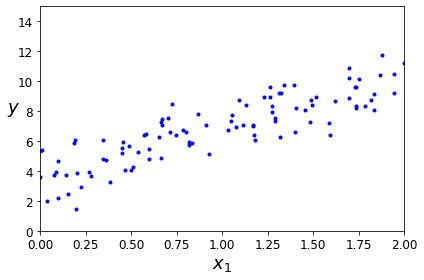

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [5]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
print(theta_best)

[[3.67216219]
 [3.28686692]]


In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.67216219],
       [10.24589604]])

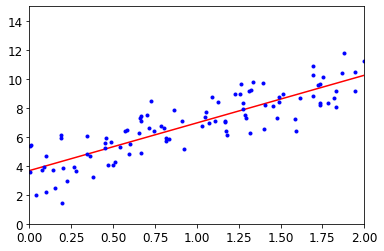

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Building a linear regression model

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lin_reg = LinearRegression()

In [11]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
lin_reg.intercept_, lin_reg.coef_

(array([3.67216219]), array([[3.28686692]]))

In [13]:
lin_reg.predict(X_new)

array([[ 3.67216219],
       [10.24589604]])

Using the small regression model above we have trained our data and we havec created a prediction.

We can see that it intercepts at roughly at 4.05 section.  The intercept represents the mean of all Y values when X = 0. 

What a linear regression model is using is a function called scipy.linalg.lstsq(). This is a much more efficient way to identify the best possible parameters than using a normal question. 

In [14]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [15]:
theta_best_svd

array([[3.67216219],
       [3.28686692]])

In [16]:
np.linalg.pinv(X_b).dot(y)

array([[3.67216219],
       [3.28686692]])

### Computational Complexity

The Normal Equation is usually O(n^2.4) up to O(n^3). This is not very efficient. 

The normal equation is often very slow when working with a large number of features or instances(data set size). Though the predictions are very fast. 

Gradient Descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. 

Gradient Descent measures the local gradient of the error function with regard to the parameter vector and it goes in the direction of descending graident . Once it reaches zero it means you have reached the minimum. 

<img src="images/training_linear_models/gradient_descent_minimum.jpeg ">

A important parameter in gradient descent is the learning rate. A small learning rate might take too long to reach the minimum and a large learning rate might make you miss the minimum

<strong>Batch Gradient Descent </strong>

Batch gradient descent is when you computing all paramters theta at once. 



In [17]:
#Quick implementation of gradient descent
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [18]:
theta

array([[3.67216219],
       [3.28686692]])

We see that BAG got us the same results of normal equation 

<strong> Stochastic Gradient Descent </strong>

SGD picks a random instance in the training set at every step and computes the gradients based only on that single instance.  The benefit of this over BGD is that BGD takes a very long time on very large datasets.

This approach will cause the cost function to bounce up and down descraing only on average. It will stop when the results are good but it might not be the optimal minimum. 

SGD is useful to use when the cost function is very irregular and jumps out of the local minimum. 

In [19]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Saving figure sgd_plot


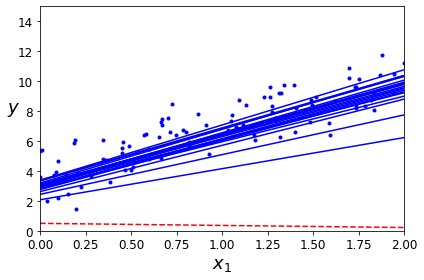

In [20]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
save_fig("sgd_plot")                                 # not shown
plt.show()                                           # not shown

In [21]:
theta

array([[3.69787542],
       [3.24152674]])

<strong> Mini-batch Gradient Descent </strong>

Mini batch gradient descent is a mix between batch and stochastic. It basically in shorts gets a random set of instances and finds the gradient. It gives you a performance boost compared to other options like SGD and much faster than BDG. 

It is less erratic than SGD it will get closer to the optimum minimum vs SGD. 

<strong> Polynominal Regression </strong>

THis is a option when the data is not a straight line. What it does is that it adds powers to each features than trains the linear model on a extended set of features. 

Saving figure quadratic_data_plot


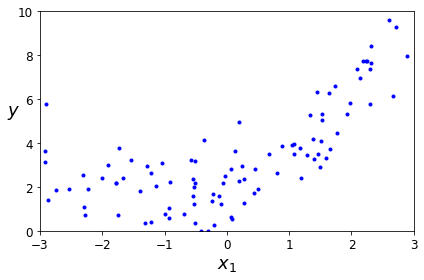

In [22]:
#Building a polynominal regression graph
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)



plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

We can see above the data has a slight curve and if we tried to fit a linear model it will not provide a good fit

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.53415534])

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.00704064]), array([[1.04541031, 0.52314711]]))

Saving figure quadratic_predictions_plot


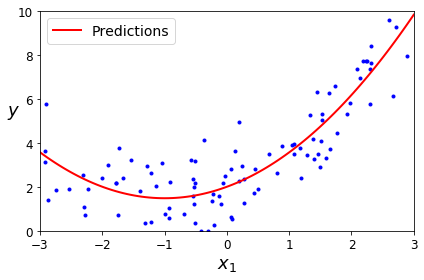

In [25]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

Saving figure high_degree_polynomials_plot


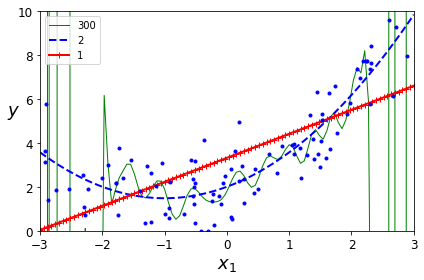

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

If you use a high degree polynominal model say to 300 degree it will tend to move slower but improve performance.

However we can see above it overfitted the data. So what is the best learning curve. Well we can compare that by printing out the learning curves

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

Saving figure underfitting_learning_curves_plot


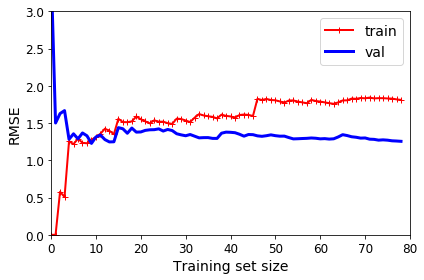

In [28]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()   

What we see above is a example low  bias  where the training and validation data both plateau. 

This indicates underfitting because there is a small gap between the training and validation performance. This suggest to improve the features or provide a higher degree of polynominal features. 

Saving figure learning_curves_plot


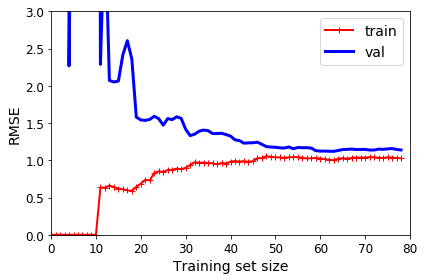

In [29]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

Here we have a high variance which is a distance between the training performance and the validation performance. 

A good way to handle overfitting is to use regulization. This means to constrain the model so it has fewer degrees of freedom. The simple way of doing this is to reduce the number of polynominal degrees. 

#### Ridge Regression

This is also known as L2 regulization or Tikhonov regularization. This forces the learning algorithm to not only the fit the data but also keep the model weights as small as poasible. *It should only be added to the cost function during training. 

The alpha or learning parameter controls how much you want to reguliarize the model. If you set the parameter to 0 it is the same as linear regression. If the parameter is very large than all weights end up very close to zero. The results is a flat line through the data's mean. 

In [30]:
#Example of Ridge Regression
from sklearn.linear_model import Ridge

In [34]:
ridge_reg = Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.96482133]])

In [36]:
from sklearn.linear_model import SGDRegressor

In [37]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.96125912])

The "l2" indicates we want to use Ridge Regression. 

#### Lasso Regression

*Least Absolute Shrinkage and Selection Operator Regression* Regression or L1. It use the l1 norm of the weight vector instead of the half of the l2 norm. 

Lasso tends to elimate the weights of the least features and sets themt o zero. 

In [39]:
#Implementing Lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.91691267])

#### When to use Lasso vs Ridge

Ridge does not remove a number of variables from the model. It will most likely still keep all. This does not make it ideal for feature selection. Lasso can in fact reduce the number of variables that are performing poorly. This makes lasso a better option. 

However Lasso is also not ideal for different data types. 

Lasso is a good option when you feel that some features may not be important since it will reduce the size of their weights to 0 or close to 0. 

Ridge is a better option when you have a small number of preditors(features) and you feel they are important. Since they will not be reduced to 0 but it will make big weights smaller and not focus much on the small weights. 

#### Elastic Net

Elastic net is a middle ground between Ridge and Lasso. It is a regulization term that is a mix of both Ridge and Lasso, when you set the ratio to 0 it is the same as Rdige when you set the ratio to 1 it is the same as Lasso. 

Elastic net is a good option when you want to reduce the number of features when you have a large amount of features. Elastic net is a good option instead of lasso because it behaves less erratically. 

In [40]:
#Short example of elastic net
from sklearn.linear_model import ElasticNet

In [41]:
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.91544454])

#### Early Stopping
Early stoping is hwne you stop training when you reach the minimum validation error. 

#### Logistic Regression
A common regression method used for classification. It is used the estimate the probability that an instance belongs to one class or another. 

Logstic regression computes the weighted sum of input features and output a probablity. so maybe y hat is 0.6 and we set our threshold to be greater than 0.5 probabilty than they are class 1. 

Ideally when training you want to predict with a high probablity that a instance belongs to a specific class. 

Saving figure logistic_function_plot


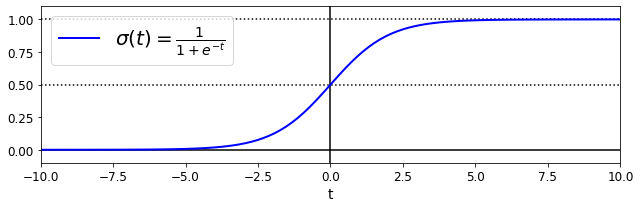

In [42]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()

In [43]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [44]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

In [45]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

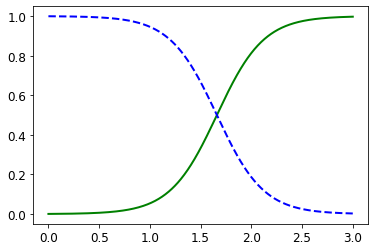

In [46]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

Saving figure logistic_regression_plot


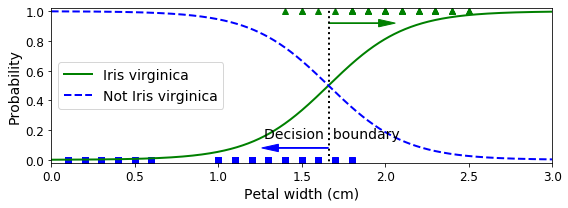

In [47]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

If we see above the decision boundry is set for *Iris virgninica* to roughly 1.4cm and greater, *Not Iris virginica* is the opposite where 1.4cm is less than that means not *Iris virgninica*. 

However we can see it is slightly confused around the 1.0 and 1.5 range where to put the flower petal. 

In [48]:
decision_boundary

array([1.66066066])

Our decision boundary is set to 1.6cm. This means that if the probability is greater than 50% that it is 1.6cm or greater than it will likely be *Iris virginicia*

Saving figure logistic_regression_contour_plot


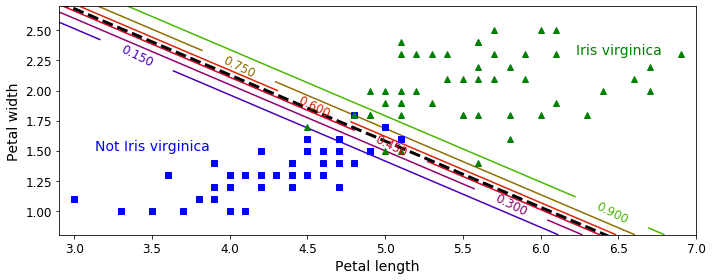

In [49]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

The above image shows two features

* Petal width
* Petal length

If we increase the decision boundary we see how this can impact the number of instances that gets placed in one class over another,

#### Softmax Regression

Logistic Regression can be generalized to suport multiple classes directly, without having to train or combine multiple binary classifiers. This is calld *Softmax Regression*

It works by saying lets say you get a instance called X Softmax model computes teh score for Sk(x) for each class k, then estimates the probabilyt of each class by applying the softmax function to the scores. 

So you can see the score if the instances belows to which class K.
<img src="images/training_linear_models/softmax.png"> </img>

##### Cross Entropy

The goal is to have a model that estimates a high probabilyt for the target class and low for the other classes. Cross entropy does this for use by penalizing the model when it estimats a low probabilty for a target class. 

# Excercises

1. Which Linear regression training can you use if you have a training set with millions of features?

Mini Batch or Stochastic Gradient decence can work. Mini batch will do it in small batches and Stochastic will calculate it on all the instances. You probably just want to avoid the normal equation. Since the normal equation is slow. 

2. Suppose the features in your training set have very different scales. Which algorithms might suffer from this and how? What can you do about it?

Gradient descent needs to be scaled along with Ridge and Lasso regression.  You can apply a scaling solution like MinMax Scaler or Standard Scaling. 

3. Can Gradient Descent get stuck in the local minimum when training a Logistic Regression model?

No it cannot because it is a convex function.

4. Do all Graident descent algorithms lead to the same model provided you let them run enough?

Assuming you have the same learning rate is not too high so it doesn't jump the minimum and hte problem is convex then yes. The models will be similar but maybe not identical.

5. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice the validation error consistenly goes up, what is likely going on? How can you fix this?

It seems like the problem is related to overfitting. One option is to provide more training examples or add a regulization term. Depending on the number of features you can choose between Lasso or Ridge. 

6. Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?

No  because of the random nature of Mini Batch Gradient Descent. It is better to save the model at regular intervals rather than stop it early. So when you find the ideal cost than you can go to that version.

7. Which Gradient Descent algorithm, will reach teh vicinity of the optimal solution the fastest, which will actually converge, How can you make the others converge as well?

The fastest will be SGD since it does 1 training instance at a time. But only Batch Gradient Descent will actually converge given enough time. As mentioned, SGD and Mini batch GD will bounce around unless you find the right learning rate by gradually reducing it. 

8. Suppose you ar eusing Polynominal Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error what is happening and what are three ways to solve it?

It seems there is a large variance, which could indicate overfitting. 3 ways to fix this are

* Regulization like Ridge, Lasso or Elastic Net
* You can increase the data size
* You can also build a model with fewer degrees of freedom.

9. Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variances? Should you increase the regularization hyperparameter or reduce it?

It seems there is a high bias. I would say you need to reduce the regulization parameter.

10. Why would you want to  use:

    a. Ridge Regression instead of Linear Regression?
           * It is always a good idea of to use some type of regulization. Models that use regulization tend to perform better,
    b. Lasso instead of Ridge Regression?
           * Lasso Regression uses a L1 penalty and it will remove unneccesary features or poor performing features. It is a good way to reduce features. 
    c. Elastic Net instead of Lasso?
           * Elastic net is less erratic than Lasso
11. Suppose you want to classify pictures as outdoor/indoor and daytime/night time. Should you implement two logistic regression cliassier or one softmax classifer.

You would like to use two logistic regression classifers. Since there are two different things you would like to predict. 